In [1]:
#import nessesry libraries 
import pandas as pd 
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#read dataset file
data = pd.read_csv("SVMdataset.csv") 
data.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [3]:
features=['x1','x2'] # Features
x=data[features]
y=data['y']
x=x.values.reshape(-2,2)


In [4]:
#splitting data 
from  sklearn.model_selection  import train_test_split
X_train,X,y_train,Y=train_test_split(x,y,train_size=0.6,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test= train_test_split(X,Y,test_size = 0.50,train_size =0.50,random_state=42)

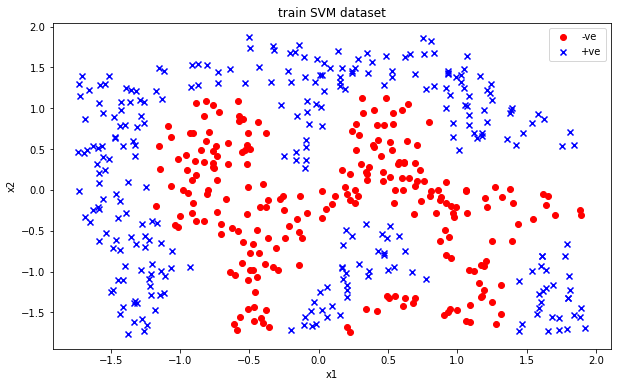

In [5]:
#plotting train dataset 
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_train [y_train== 0][:, 0], X_train [y_train== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_train [y_train== 1][:, 0], X_train [y_train== 1][:, 1],marker='x', color='b', label='+ve')
plt.legend();
plt.title('train SVM dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

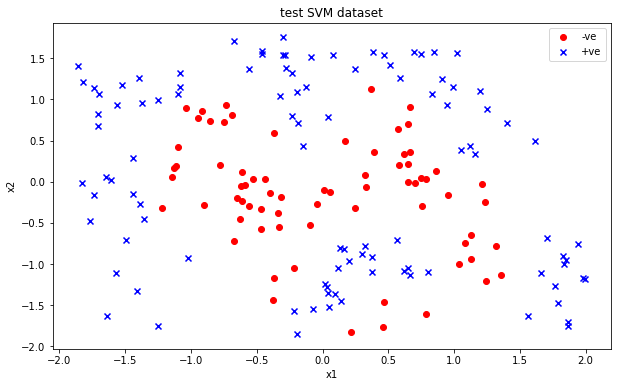

In [6]:
#plotting test dataset 

X_test = StandardScaler().fit_transform(X_test )
plt.figure(figsize=(10, 6))
plt.scatter(X_test [y_test== 0][:, 0], X_test [y_test== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_test [y_test== 1][:, 0], X_test [y_test== 1][:, 1],marker='x', color='b', label='+ve')
plt.legend();
plt.title('test SVM dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

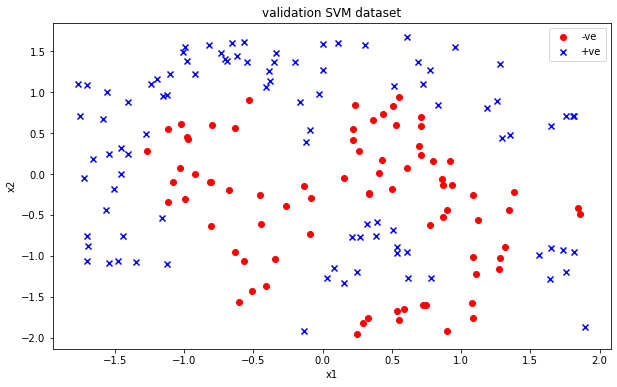

In [7]:
#plotting validation dataset 

X_cv= StandardScaler().fit_transform(X_cv)
plt.figure(figsize=(10, 6))
plt.scatter(X_cv[y_cv== 0][:, 0],X_cv [y_cv== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_cv [y_cv== 1][:, 0],X_cv [y_cv== 1][:, 1],marker='x', color='b', label='+ve')
plt.legend();
plt.title('validation SVM dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
print('classifier with linear kernel.')

classifier with linear kernel.


In [9]:
#For the classifier with linear kernel i create a for loop to try a range of C values to find
#the C value that gives the best F1 score using the validation data.


c_values_l=[]

for i in range(1,100,2):
    i=i*0.001
    c_values_l.append(i)
max_f1_score = float('-inf')
best_c = None
for c in c_values_l:

    linear_clf = svm.SVC(kernel='linear',C=c)
    linear_clf.fit(X_train, y_train)
    y_pred = linear_clf.predict(X_cv)
    current_f1_score = metrics.f1_score(y_cv, y_pred)

    if current_f1_score > max_f1_score:
        max_f1_score = current_f1_score
        best_c = c


print('best c: ',best_c)


best c:  0.011


In [10]:
#Print the values of accuracy, prescion, recall, and F1 score for the the validation datasets

print('classification report for validation SVM dataset')
linear_clf = svm.SVC(kernel='linear',C=best_c)
linear_clf.fit(X_train, y_train)
y_pred_l = linear_clf.predict(X_cv)
print(confusion_matrix(y_cv,y_pred_l))
print(classification_report(y_cv,y_pred_l))
print('************************')
cnf_matrix_l = metrics.confusion_matrix(y_cv, y_pred_l)
tn, fp, fn, tp = metrics.confusion_matrix(y_cv, y_pred_l).ravel()
print("confusion_matrix:",cnf_matrix_l)
print("tn: ",tn," ",",fp: ", fp," ",",fn: ", fn," " ,",tp: ", tp)
print('************************')
print('classification report for validation SVM dataset')
acc=metrics.accuracy_score(y_cv, y_pred_l)
print("Accuracy:",acc)
pre=metrics.precision_score(y_cv, y_pred_l)
print("Precision:",pre)
rec=metrics.recall_score(y_cv, y_pred_l)
print("Recall:",rec)
fscore=metrics.f1_score(y_cv, y_pred_l)
print("f1 score:",fscore)
auc=metrics.roc_auc_score(y_cv, y_pred_l)
print("auc roc:",auc)

classification report for validation SVM dataset
[[12 67]
 [ 6 88]]
              precision    recall  f1-score   support

           0       0.67      0.15      0.25        79
           1       0.57      0.94      0.71        94

    accuracy                           0.58       173
   macro avg       0.62      0.54      0.48       173
weighted avg       0.61      0.58      0.50       173

************************
confusion_matrix: [[12 67]
 [ 6 88]]
tn:  12   ,fp:  67   ,fn:  6   ,tp:  88
************************
classification report for validation SVM dataset
Accuracy: 0.5780346820809249
Precision: 0.567741935483871
Recall: 0.9361702127659575
f1 score: 0.7068273092369478
auc roc: 0.5440344734715864


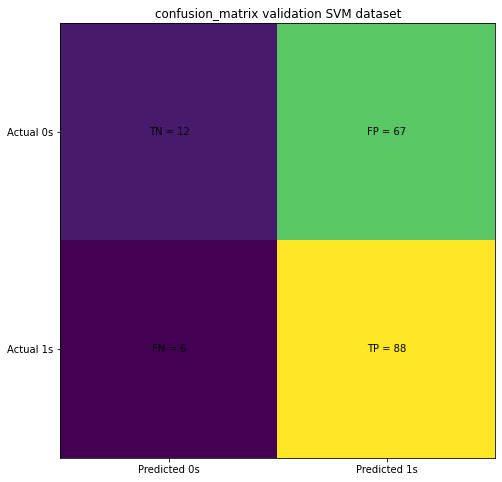

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cnf_matrix_l)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(s[i][j])+" = "+str(cnf_matrix_l[i][j]), ha='center', va='center', color='black')
plt.title('confusion_matrix validation SVM dataset')
plt.show()

confusion_matrix validation SVM dataset


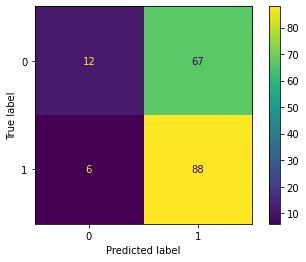

In [12]:
print('confusion_matrix validation SVM dataset')
plot_confusion_matrix(linear_clf, X_cv, y_cv)

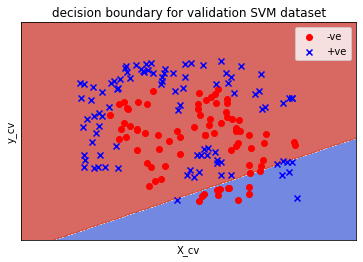

In [13]:
#Print linear svc decision boundary for validation dataset

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

linear_clf = svm.SVC(kernel='linear',C=best_c)
linear_clf.fit(X_train, y_train)

fig, ax = plt.subplots()

xx, yy = make_meshgrid( X_cv[:, 0], X_cv[:, 1])

plot_contours(ax, linear_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_cv[y_cv== 0][:, 0],X_cv [y_cv== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_cv [y_cv== 1][:, 0],X_cv [y_cv== 1][:, 1],marker='x', color='b', label='+ve')

ax.set_ylabel('y_cv')
ax.set_xlabel('X_cv')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('decision boundary for validation SVM dataset')
ax.legend()
plt.show()

confusion_matrix train SVM dataset


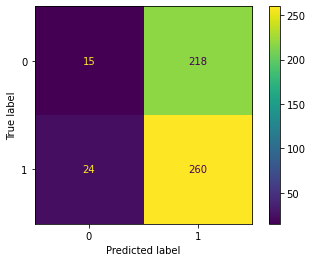

In [14]:
#Print linearconfusion_matrix train SVM dataset

print('confusion_matrix train SVM dataset')
plot_confusion_matrix(linear_clf, X_train, y_train)

In [15]:
#Print the values of accuracy, prescion, recall, and F1 score for the the train datasets

print('classification report for train SVM dataset')
linear_clf = svm.SVC(kernel='linear',C=best_c)
linear_clf.fit(X_train, y_train)
y_pred_l = linear_clf.predict(X_train)
print(confusion_matrix(y_train,y_pred_l))
print(classification_report(y_train,y_pred_l))
print('************************')
cnf_matrix_l = metrics.confusion_matrix(y_train, y_pred_l)
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred_l).ravel()
print("confusion_matrix:",cnf_matrix_l)
print("tn: ",tn," ",",fp: ", fp," ",",fn: ", fn," " ,",tp: ", tp)
print('************************')
print('classification report for train SVM dataset')
acc=metrics.accuracy_score(y_train, y_pred_l)
print("Accuracy:",acc)
pre=metrics.precision_score(y_train, y_pred_l)
print("Precision:",pre)
rec=metrics.recall_score(y_train, y_pred_l)
print("Recall:",rec)
fscore=metrics.f1_score(y_train, y_pred_l)
print("f1 score:",fscore)
auc=metrics.roc_auc_score(y_train, y_pred_l)
print("auc roc:",auc)

classification report for train SVM dataset
[[ 15 218]
 [ 24 260]]
              precision    recall  f1-score   support

           0       0.38      0.06      0.11       233
           1       0.54      0.92      0.68       284

    accuracy                           0.53       517
   macro avg       0.46      0.49      0.40       517
weighted avg       0.47      0.53      0.42       517

************************
confusion_matrix: [[ 15 218]
 [ 24 260]]
tn:  15   ,fp:  218   ,fn:  24   ,tp:  260
************************
classification report for train SVM dataset
Accuracy: 0.5319148936170213
Precision: 0.5439330543933054
Recall: 0.9154929577464789
f1 score: 0.6824146981627296
auc roc: 0.48993532007495616


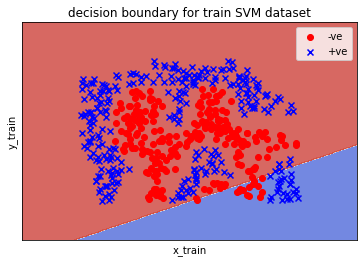

In [16]:
#Print linear svc decision boundary for training dataset

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

linear_clf = svm.SVC(kernel='linear',C=best_c)
linear_clf.fit(X_train, y_train)

fig, ax = plt.subplots()

xx, yy = make_meshgrid( X_train[:, 0], X_train[:, 1])

plot_contours(ax, linear_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train[y_train== 0][:, 0],X_train [y_train== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_train [y_train== 1][:, 0],X_train [y_train== 1][:, 1],marker='x', color='b', label='+ve')

ax.set_ylabel('y_train')
ax.set_xlabel('x_train')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('decision boundary for train SVM dataset')
ax.legend()
plt.show()

confusion_matrix test SVM dataset


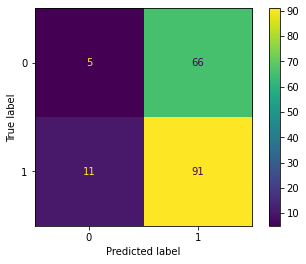

In [17]:
print('confusion_matrix test SVM dataset')

plot_confusion_matrix(linear_clf, X_test, y_test)

In [18]:
#Print the values of accuracy, prescion, recall, and F1 score for the the test datasets

print('classification report for test SVM dataset')
linear_clf = svm.SVC(kernel='linear',C=best_c)
linear_clf.fit(X_train, y_train)
y_pred_l = linear_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_l))
print(classification_report(y_test,y_pred_l))
print('************************')
cnf_matrix_l = metrics.confusion_matrix(y_test,y_pred_l)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_pred_l).ravel()
print("confusion_matrix:",cnf_matrix_l)
print("tn: ",tn," ",",fp: ", fp," ",",fn: ", fn," " ,",tp: ", tp)
print('************************')
print('classification report for test SVM dataset')
acc=metrics.accuracy_score(y_test,y_pred_l)
print("Accuracy:",acc)
pre=metrics.precision_score(y_test,y_pred_l)
print("Precision:",pre)
rec=metrics.recall_score(y_test,y_pred_l)
print("Recall:",rec)
fscore=metrics.f1_score(y_test,y_pred_l)
print("f1 score:",fscore)
auc=metrics.roc_auc_score(y_test,y_pred_l)
print("auc roc:",auc)

classification report for test SVM dataset
[[ 5 66]
 [11 91]]
              precision    recall  f1-score   support

           0       0.31      0.07      0.11        71
           1       0.58      0.89      0.70       102

    accuracy                           0.55       173
   macro avg       0.45      0.48      0.41       173
weighted avg       0.47      0.55      0.46       173

************************
confusion_matrix: [[ 5 66]
 [11 91]]
tn:  5   ,fp:  66   ,fn:  11   ,tp:  91
************************
classification report for test SVM dataset
Accuracy: 0.5549132947976878
Precision: 0.5796178343949044
Recall: 0.8921568627450981
f1 score: 0.7027027027027027
auc roc: 0.48128969897818286


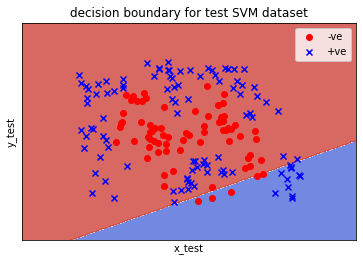

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

linear_clf = svm.SVC(kernel='linear',C=best_c)
linear_clf.fit(X_train, y_train)

fig, ax = plt.subplots()
# title for the plots

xx, yy = make_meshgrid( X_test[:, 0], X_test[:, 1])

plot_contours(ax, linear_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_test[y_test== 0][:, 0],X_test [y_test== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_test [y_test== 1][:, 0],X_test [y_test== 1][:, 1],marker='x', color='b', label='+ve')

ax.set_ylabel('y_test')
ax.set_xlabel('x_test')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('decision boundary for test SVM dataset')
ax.legend()
plt.show()

In [20]:
print('*****************************')
print('classifier with gaussian kernel.')

*****************************
classifier with gaussian kernel.


In [22]:
#For the classifier with gaussian kernel i create a for loop to try a range of C values and gamma values to find
#the C value and gamma value that gives the best F1 score using the validation data.

c_values_rbf =[50,60,70,80,90,100]
gamma_values_rbf= [50,60,70,80,90,100]
  
max_f1_score = float('-inf')
best_c = None
best_g= None


for c in c_values_rbf:
    for g in gamma_values_rbf:
        rbf_clf = svm.SVC(kernel='rbf',C=c, gamma=g)
        rbf_clf.fit(X_train, y_train)
        y_pred_rbf = rbf_clf.predict(X_cv)
        current_f1_score = metrics.f1_score(y_cv, y_pred)
        if current_f1_score > max_f1_score:
            max_f1_score = current_f1_score
            best_c = c
            best_g=g
            
print('best c: ',best_c)
print('best g: ',best_g)

best c:  50
best g:  50


In [23]:
print('classification report for validation SVM dataset')
rbf_clf = svm.SVC(kernel='rbf',C=best_c,gamma=best_g)
rbf_clf.fit(X_train, y_train)
y_pred_rbf= rbf_clf.predict(X_cv)
print(confusion_matrix(y_cv,y_pred_rbf))
print(classification_report(y_cv,y_pred_rbf))        

print('************************')
cnf_matrix_rbf = metrics.confusion_matrix(y_cv,y_pred_rbf)
tn, fp, fn, tp = metrics.confusion_matrix(y_cv,y_pred_rbf).ravel()
print("confusion_matrix:",cnf_matrix_rbf)
print("tn: ",tn," ",",fp: ", fp," ",",fn: ", fn," " ,",tp: ", tp)
print('************************')
print('classification report for validation SVM dataset')

acc=metrics.accuracy_score(y_cv,y_pred_rbf)
print("Accuracy:",acc)
pre=metrics.precision_score(y_cv,y_pred_rbf)
print("Precision:",pre)
rec=metrics.recall_score(y_cv,y_pred_rbf)
print("Recall:",rec)
fscore=metrics.f1_score(y_cv,y_pred_rbf, average='weighted')
print("f1 score:",fscore)
auc=metrics.roc_auc_score(y_cv,y_pred_rbf)
print("auc roc:",auc)

classification report for validation SVM dataset
[[72  7]
 [ 5 89]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        79
           1       0.93      0.95      0.94        94

    accuracy                           0.93       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.93      0.93      0.93       173

************************
confusion_matrix: [[72  7]
 [ 5 89]]
tn:  72   ,fp:  7   ,fn:  5   ,tp:  89
************************
classification report for validation SVM dataset
Accuracy: 0.930635838150289
Precision: 0.9270833333333334
Recall: 0.9468085106382979
f1 score: 0.9305562706232008
auc roc: 0.9291004578507944


confusion_matrix validation SVM dataset


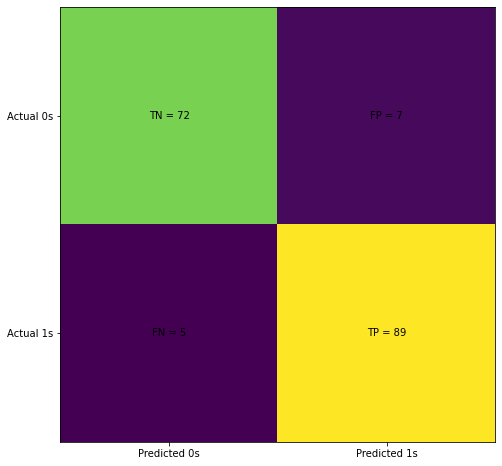

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cnf_matrix_rbf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(s[i][j])+" = "+str(cnf_matrix_rbf[i][j]), ha='center', va='center', color='black')
print('confusion_matrix validation SVM dataset')
plt.show()

confusion_matrix validation SVM dataset


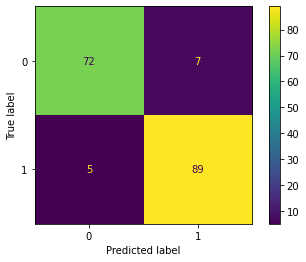

In [25]:
print('confusion_matrix validation SVM dataset')
plot_confusion_matrix(rbf_clf, X_cv, y_cv)       

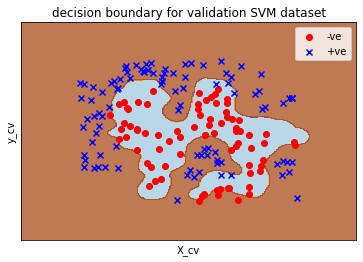

In [26]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

rbf_clf = svm.SVC(kernel='rbf',C=best_c,gamma=best_g)
rbf_clf.fit(X_train, y_train)

fig, ax = plt.subplots()

xx, yy = make_meshgrid( X_cv[:, 0], X_cv[:, 1])

plot_contours(ax, rbf_clf, xx, yy, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_cv[y_cv== 0][:, 0],X_cv [y_cv== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_cv [y_cv== 1][:, 0],X_cv [y_cv== 1][:, 1],marker='x', color='b', label='+ve')
# ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y_cv')
ax.set_xlabel('X_cv')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('decision boundary for validation SVM dataset')
ax.legend()
plt.show()

In [27]:
print('classification report for test SVM dataset')
rbf_clf = svm.SVC(kernel='rbf',C=best_c,gamma=best_g)
rbf_clf.fit(X_train, y_train)
y_pred_rbf = rbf_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))        

print('************************')
cnf_matrix_rbf = metrics.confusion_matrix(y_test,y_pred_rbf)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_pred_rbf).ravel()
print("confusion_matrix:",cnf_matrix_rbf)
print("tn: ",tn," ",",fp: ", fp," ",",fn: ", fn," " ,",tp: ", tp)
print('************************')
print('classification report for test SVM dataset')
acc=metrics.accuracy_score(y_test,y_pred_rbf)
print("Accuracy:",acc)
pre=metrics.precision_score(y_test,y_pred_rbf)
print("Precision:",pre)
rec=metrics.recall_score(y_test,y_pred_rbf)
print("Recall:",rec)
fscore=metrics.f1_score(y_test,y_pred_rbf)
print("f1 score:",fscore)
auc=metrics.roc_auc_score(y_test,y_pred_rbf)
print("auc roc:",auc)

classification report for test SVM dataset
[[ 68   3]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.97      1.00      0.99       102

    accuracy                           0.98       173
   macro avg       0.99      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173

************************
confusion_matrix: [[ 68   3]
 [  0 102]]
tn:  68   ,fp:  3   ,fn:  0   ,tp:  102
************************
classification report for test SVM dataset
Accuracy: 0.9826589595375722
Precision: 0.9714285714285714
Recall: 1.0
f1 score: 0.9855072463768115
auc roc: 0.9788732394366197


confusion_matrix test SVM dataset


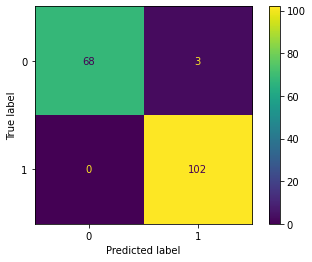

In [28]:
print('confusion_matrix test SVM dataset')
plot_confusion_matrix(rbf_clf, X_test, y_test)       

confusion_matrix test SVM dataset


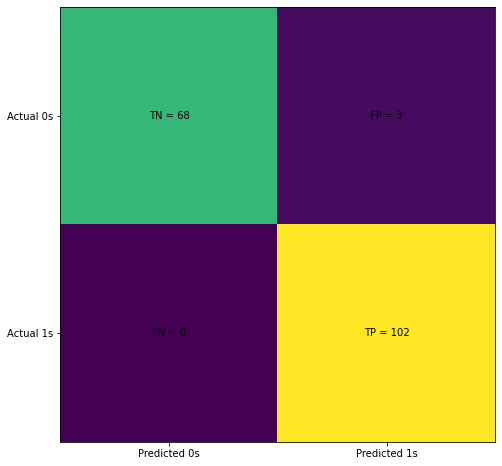

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cnf_matrix_rbf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(s[i][j])+" = "+str(cnf_matrix_rbf[i][j]), ha='center', va='center', color='black')
print('confusion_matrix test SVM dataset')
plt.show()

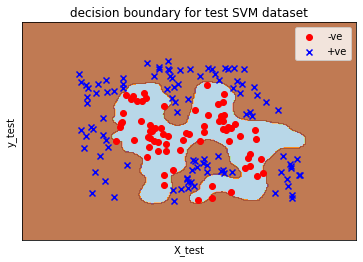

In [30]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

rbf_clf = svm.SVC(kernel='rbf',C=best_c,gamma=best_g)
rbf_clf.fit(X_train, y_train)

fig, ax = plt.subplots()

xx, yy = make_meshgrid( X_test[:, 0], X_test[:, 1])

plot_contours(ax, rbf_clf, xx, yy, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_test[y_test== 0][:, 0],X_test [y_test== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_test [y_test== 1][:, 0],X_test [y_test== 1][:, 1],marker='x', color='b', label='+ve')
# ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y_test')
ax.set_xlabel('X_test')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('decision boundary for test SVM dataset')
ax.legend()
plt.show()

In [31]:
print('classification report for train SVM dataset')
rbf_clf = svm.SVC(kernel='rbf',C=best_c,gamma=best_g)
rbf_clf.fit(X_train, y_train)
y_pred_rbf= rbf_clf.predict(X_train)
print(confusion_matrix(y_train,y_pred_rbf))
print(classification_report(y_train,y_pred_rbf))        

print('************************')
cnf_matrix_rbf = metrics.confusion_matrix(y_train,y_pred_rbf)
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_pred_rbf).ravel()
print("confusion_matrix:",cnf_matrix_rbf)
print("tn: ",tn," ",",fp: ", fp," ",",fn: ", fn," " ,",tp: ", tp)
print('************************')
print('classification report for train SVM dataset')
acc=metrics.accuracy_score(y_train,y_pred_rbf)
print("Accuracy:",acc)
pre=metrics.precision_score(y_train,y_pred_rbf)
print("Precision:",pre)
rec=metrics.recall_score(y_train,y_pred_rbf)
print("Recall:",rec)
fscore=metrics.f1_score(y_train,y_pred_rbf)
print("f1 score:",fscore)
auc=metrics.roc_auc_score(y_train,y_pred_rbf)
print("auc roc:",auc)

classification report for train SVM dataset
[[233   0]
 [  0 284]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       284

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517

************************
confusion_matrix: [[233   0]
 [  0 284]]
tn:  233   ,fp:  0   ,fn:  0   ,tp:  284
************************
classification report for train SVM dataset
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
auc roc: 1.0


confusion_matrix train SVM dataset


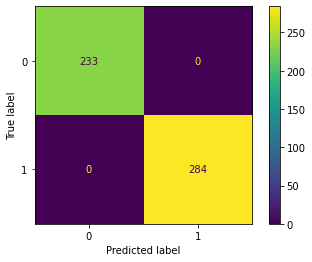

In [32]:
print('confusion_matrix train SVM dataset')
plot_confusion_matrix(rbf_clf, X_train, y_train)      

confusion_matrix train SVM dataset


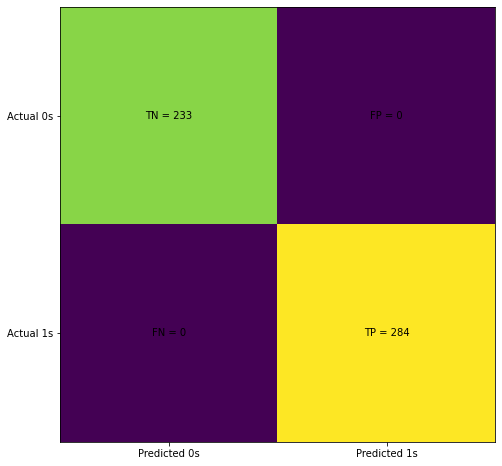

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cnf_matrix_rbf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(s[i][j])+" = "+str(cnf_matrix_rbf[i][j]), ha='center', va='center', color='black')
print('confusion_matrix train SVM dataset')
plt.show()

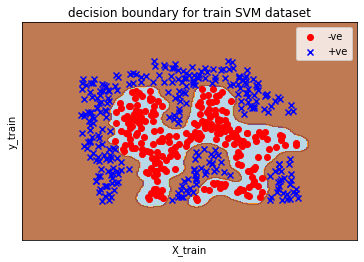

In [34]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

rbf_clf = svm.SVC(kernel='rbf',C=best_c,gamma=best_g)
rbf_clf.fit(X_train, y_train)

fig, ax = plt.subplots()

xx, yy = make_meshgrid( X_train[:, 0], X_train[:, 1])

plot_contours(ax, rbf_clf, xx, yy, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_train[y_train== 0][:, 0],X_train [y_train== 0][:, 1],marker='o', color='r', label='-ve')
plt.scatter(X_train [y_train== 1][:, 0],X_train [y_train== 1][:, 1],marker='x', color='b', label='+ve')
# ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y_train')
ax.set_xlabel('X_train')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('decision boundary for train SVM dataset')
ax.legend()
plt.show()